In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
air = pd.read_csv("C:\\Users\\bhimr\\OneDrive\\Documents\\Clustering\\EastWestAirlines.csv")


In [3]:
air.drop(['ID#', 'Qual_miles', 'cc2_miles', 'cc3_miles'], axis=1, inplace=True)  # Drop unnecessary columns


In [4]:
air = air.drop_duplicates()


In [5]:
air.isnull().sum()  

Balance              0
cc1_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

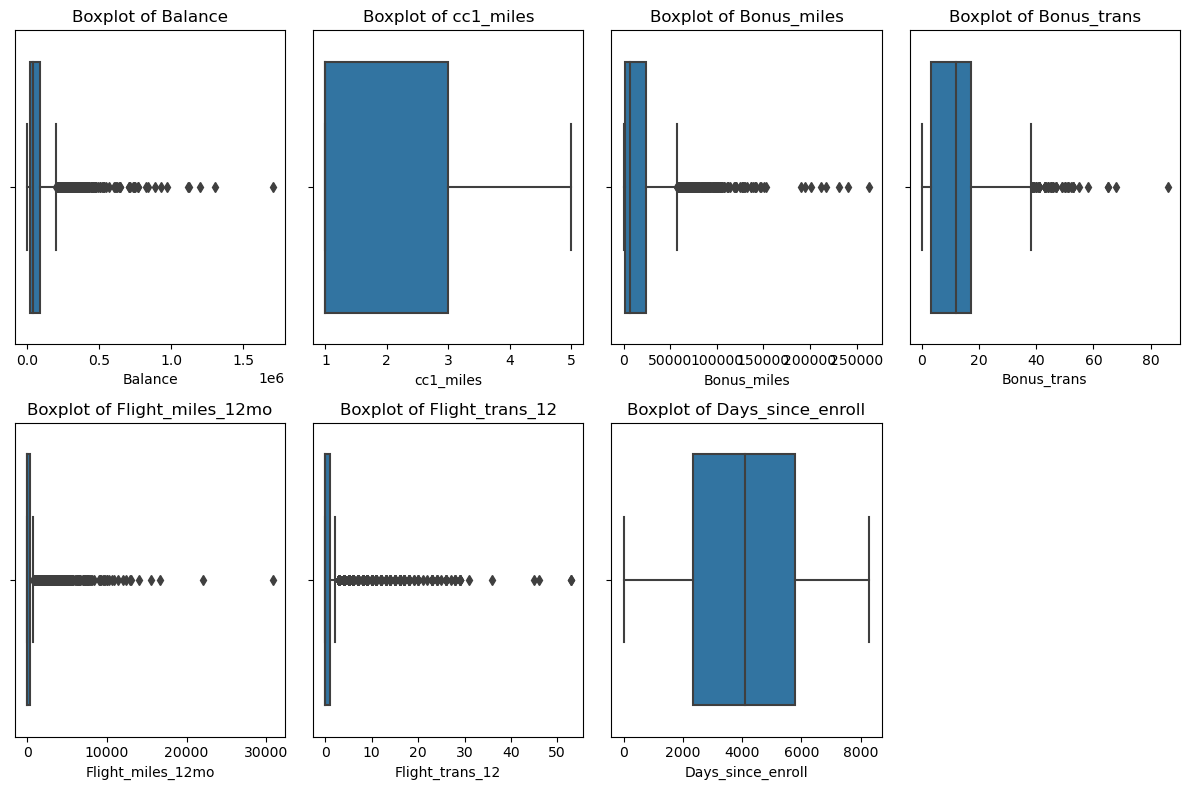

In [6]:
columns = ['Balance', 'cc1_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=air[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [7]:
for column in columns:
    Q1 = air[column].quantile(0.25)
    Q3 = air[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    air = air[(air[column] >= lower_bound) & (air[column] <= upper_bound)]


In [8]:
scaler = StandardScaler()
scaled_air = scaler.fit_transform(air[columns])


In [9]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
air['Cluster'] = dbscan.fit_predict(scaled_air)


In [10]:
print(air[['Cluster']].value_counts())

Cluster
 0         1532
 4          379
 3          227
 1          177
-1          134
 2            7
 7            7
 5            5
 6            5
Name: count, dtype: int64


In [11]:
cleaned_air = air[air['Cluster'] != -1]
cleaned_air

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,1,174,1,0,0,7000,0,0
1,19244,1,215,2,0,0,6968,0,0
2,41354,1,4123,4,0,0,7034,0,0
3,14776,1,500,1,0,0,6952,0,0
5,16420,1,0,0,0,0,6942,0,0
...,...,...,...,...,...,...,...,...,...
3992,11181,1,929,12,0,0,1407,0,0
3993,3974,1,365,3,0,0,1397,0,0
3995,64385,1,981,5,0,0,1395,1,0
3996,73597,3,25447,8,0,0,1402,1,4


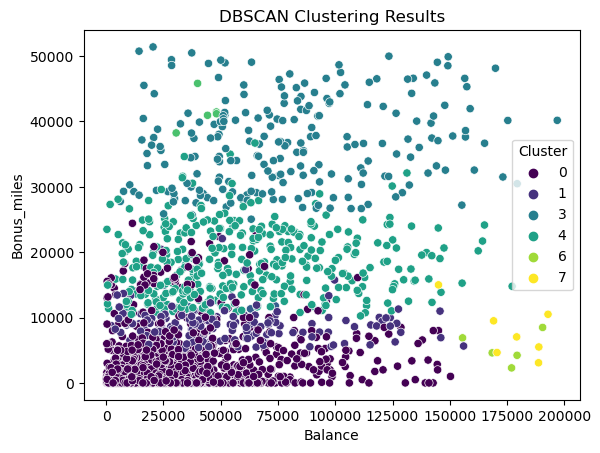

In [12]:
sns.scatterplot(data=cleaned_air, x='Balance', y='Bonus_miles', hue='Cluster', palette='viridis', marker='o')
plt.title('DBSCAN Clustering Results')
plt.show()

In [13]:
#K-MEANS CLUSTERING

<function matplotlib.pyplot.show(close=None, block=None)>

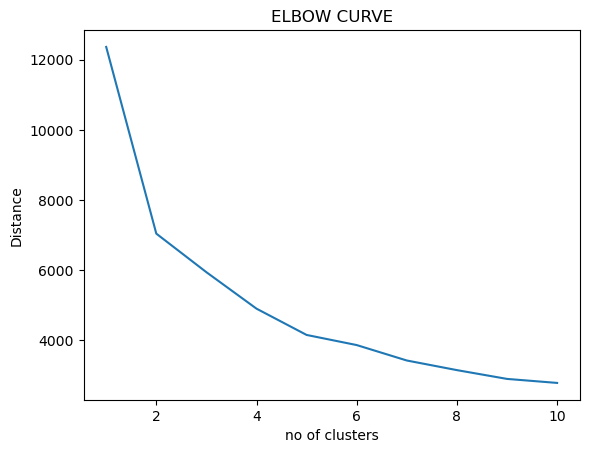

In [14]:
asc = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(scaled_air)
    asc.append(kmeans.inertia_)
    
plt.plot(range(1,11),asc)
plt.title("ELBOW CURVE")
plt.xlabel("no of clusters")
plt.ylabel("Distance")
plt.show

In [15]:
new_cluster = KMeans(7,random_state = 42)
air['cluster'] = new_cluster.fit_predict(scaled_air)

In [16]:
new_cluster.labels_

array([4, 4, 4, ..., 1, 2, 1])

In [17]:
print(air[['cluster']].value_counts())

cluster
1          663
4          574
2          384
3          339
6          211
0          153
5          149
Name: count, dtype: int64


In [18]:
cleaned_air1 = air[air['cluster'] != -1]
cleaned_air1

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster,cluster
0,28143,1,174,1,0,0,7000,0,0,4
1,19244,1,215,2,0,0,6968,0,0,4
2,41354,1,4123,4,0,0,7034,0,0,4
3,14776,1,500,1,0,0,6952,0,0,4
5,16420,1,0,0,0,0,6942,0,0,4
...,...,...,...,...,...,...,...,...,...,...
3992,11181,1,929,12,0,0,1407,0,0,3
3993,3974,1,365,3,0,0,1397,0,0,1
3995,64385,1,981,5,0,0,1395,1,0,1
3996,73597,3,25447,8,0,0,1402,1,4,2


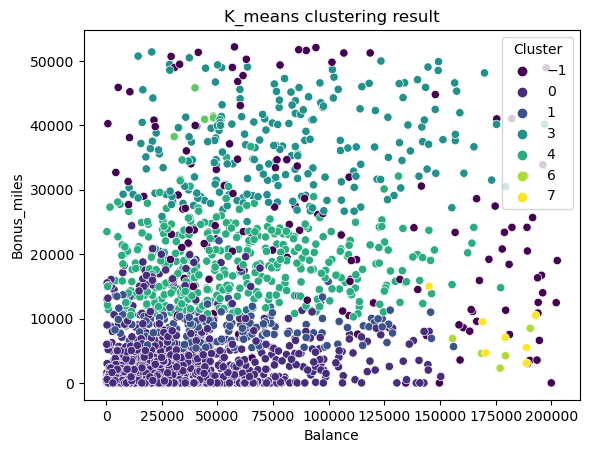

In [19]:
sns.scatterplot(data=cleaned_air1, x='Balance', y='Bonus_miles', hue='Cluster', palette='viridis', marker='o')
plt.title('K_means clustering result')
plt.show()

print(air1[['cluster']].value_counts())

In [20]:
#Hierarchical clustering


In [21]:
#columns_to_drop = ['Flight_miles_12mo', 'Flight_trans_12']
#air1 = air.drop(columns=columns_to_drop, axis=1)
#columns = ['Balance', 'cc1_miles', 'Bonus_miles', 'Bonus_trans', 'Days_since_enroll']



In [22]:
#def normalize(df):
    #return (df - df.min()) / (df.max() - df.min())

In [23]:
#df_nor = normalize(air[columns])

In [25]:
columns_to_drop = ['Flight_miles_12mo', 'Flight_trans_12']
air = air.drop(columns=columns_to_drop, axis=1)

In [27]:
columns = ['Balance', 'cc1_miles', 'Bonus_miles', 'Bonus_trans', 'Days_since_enroll']
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

df_nor = normalize(air[columns])

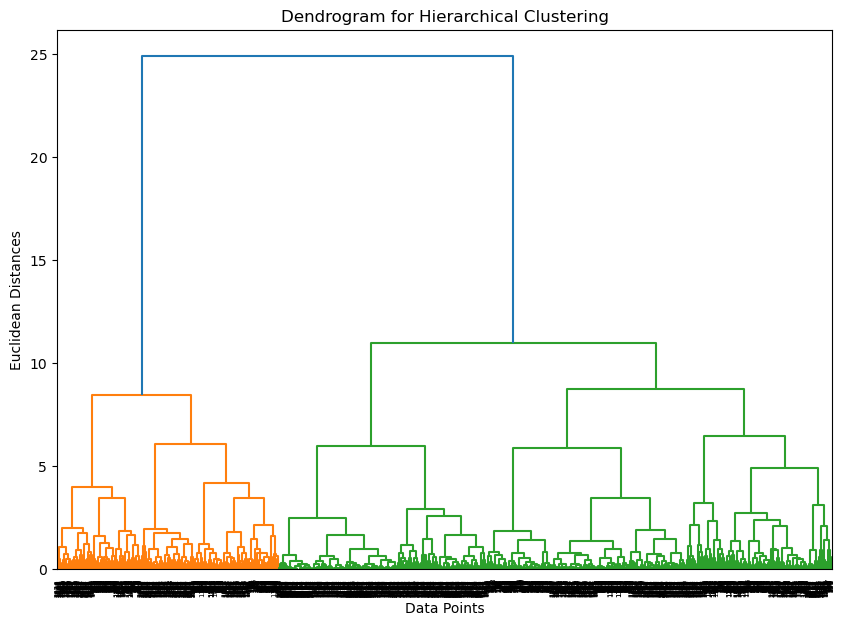

In [34]:
plt.figure(figsize=(10, 7))
#dendrogram = sch.dendrogram(sch.linkage(df_nor, method='single'))
z = sch.linkage(df_nor,method='ward')
sch.dendrogram(z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distances")
plt.show()

In [30]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
air['Cluster'] = hc.fit_predict(df_nor)

In [31]:
print(air['Cluster'].value_counts())

Cluster
2    663
3    638
0    463
1    442
4    267
Name: count, dtype: int64


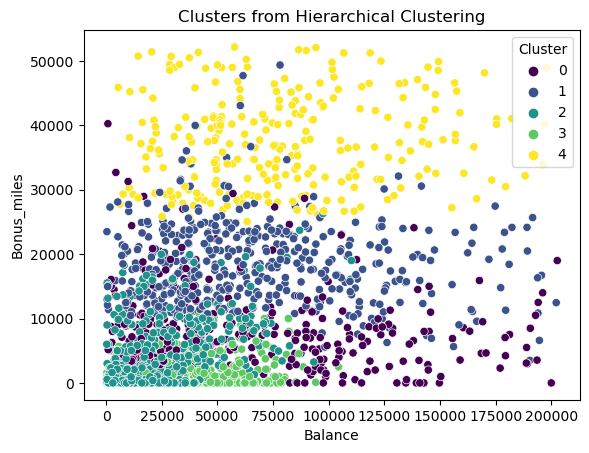

In [32]:
sns.scatterplot(data=air, x='Balance', y='Bonus_miles', hue='Cluster', palette='viridis')
plt.title('Clusters from Hierarchical Clustering')
plt.show()